# <u> AIML Module Project-3 Submission  </u>

In [1]:
# Importing all the required libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from scipy.stats import chi2_contingency,f_oneway
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

### <u> PART 1 : Import and warehouse data </u>

In [2]:
# Importing data from local
Telecom = pd.read_csv("C:/Users/INANNAR/Desktop/ABB/My Learnings/GreatLearning AIML/Project 3/TelcomCustomer-Churn.csv")

In [3]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
Telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
## To: Do: Import from MYSQL

### <u> PART 2 : Data Cleansing </u>

* Total Charges column is an object and should be converted to float.
* Identify if all data in 'TotalCharges' is numeric or not, alternatively , look for empty strings

In [6]:
len(Telecom[Telecom['TotalCharges'].eq(" ") == True])

11

* Out of 7043 rows 11 entries are empty for 'TotalCharges' so it is safe to drop those columns
* Here, empty data is not replaced by corresponding 'MonthlyCharges' because the count is less and it is safe to drop

### Missing value treatment

In [7]:
# Dropping empty entried in 'TotalCharges' column
Telecom = Telecom.drop(Telecom[Telecom['TotalCharges'].eq(" ") == True].index)

# Converting the column to float datatype.
Telecom["TotalCharges"].astype(float)
Telecom["TotalCharges"] = pd.to_numeric(Telecom["TotalCharges"])

In [8]:
# SeniorCitizen column is basically a bool type column telling if the customer is senior citizen or not.
# So, converting the column to object type so it is not mininterpretted as numeric data

Telecom['SeniorCitizen'] = pd.DataFrame(Telecom['SeniorCitizen'], dtype='object')

In [9]:
Telecom.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
## To Do: Automate all steps

### <u> PART 3 : Data analysis and visualisation <u>

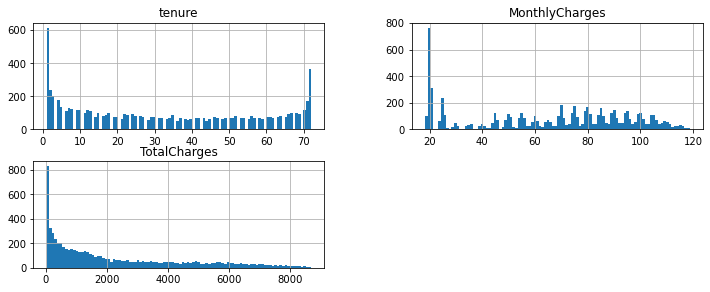

In [11]:
# Histogram of continuous columns
columns = list(Telecom)[0:-1] # Excluding Outcome column which is a category
Telecom[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(12,2)); 

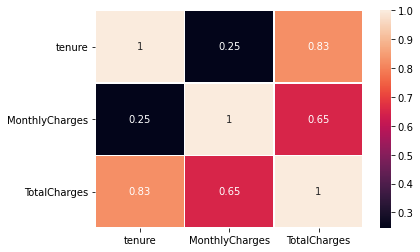

In [12]:
# Getting the correlation matrix 
ax = sns.heatmap(Telecom.corr(), annot = True, linewidth=0.5)
plt.show()

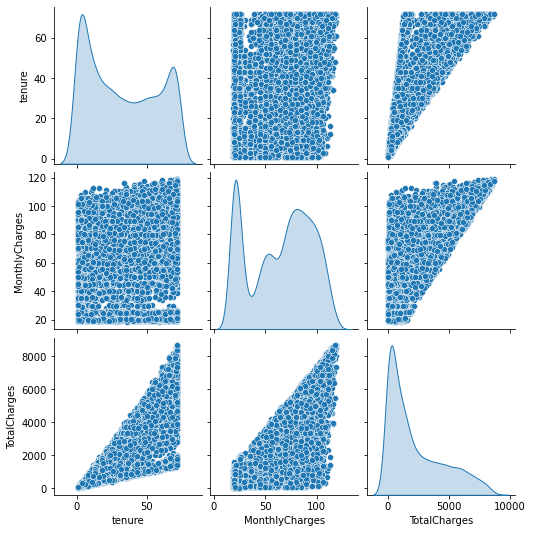

In [13]:
columns = ['tenure','MonthlyCharges','TotalCharges']
sns.pairplot(Telecom[columns],diag_kind='kde')

In [14]:
cat_col = Telecom.select_dtypes(include=['object']).columns
cat_col

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [15]:
cont_col = Telecom.select_dtypes(include=['int64','float64']).columns
cont_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Bivariate/Multivariate Analysis

#### 1. Customer churn analysis based on customer account information

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

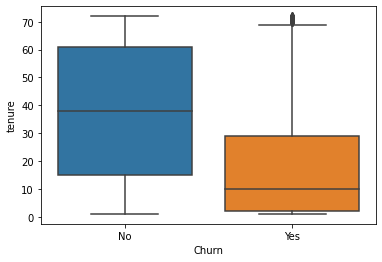

In [16]:
sns.boxplot(x='Churn', y='tenure', data=Telecom)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

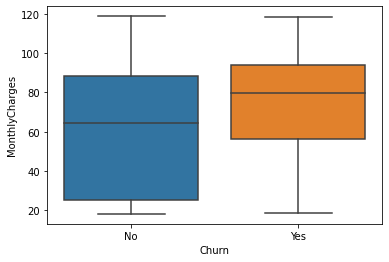

In [17]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=Telecom)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

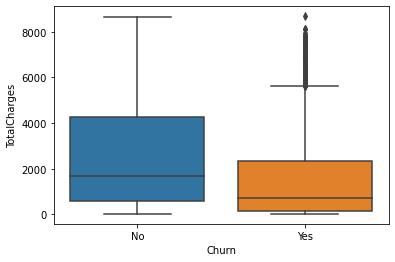

In [18]:
sns.boxplot(x='Churn', y='TotalCharges', data=Telecom)

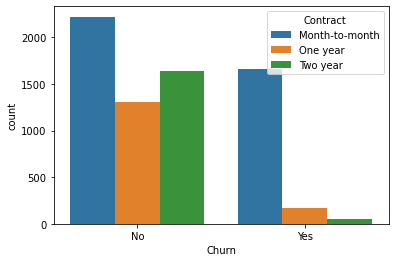

In [19]:
sns.countplot(x='Churn', hue = 'Contract', data=Telecom);

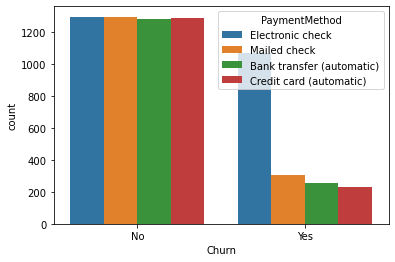

In [20]:
sns.countplot(x='Churn', hue = 'PaymentMethod', data=Telecom);

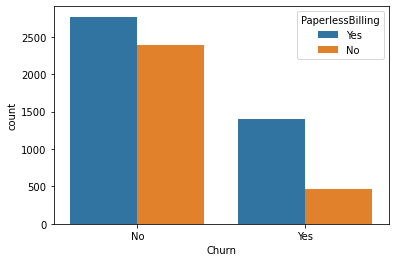

In [21]:
sns.countplot(x='Churn', hue = 'PaperlessBilling', data=Telecom);

### Comments: 
* The distribution of tenure for the customers who discontinued with the telecom company is of lower 
* Total Charges being a cumulative number, is quite high for few of the people who have been the customers for a very long time.Hence, the outliers in the data.
* Majority of the customers who discontinued with the telecom company where on a monthly contract

#### 2. Customer churn analysis based on services used by the customer

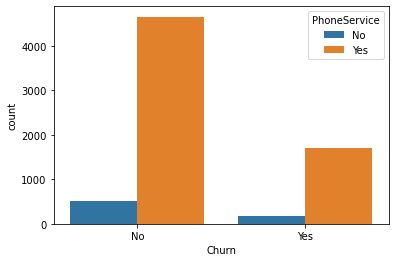

In [22]:
sns.countplot(x='Churn', hue = 'PhoneService', data=Telecom);

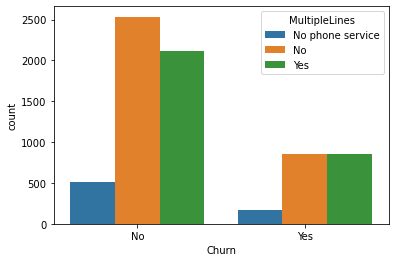

In [23]:
sns.countplot(x='Churn', hue = 'MultipleLines', data=Telecom);

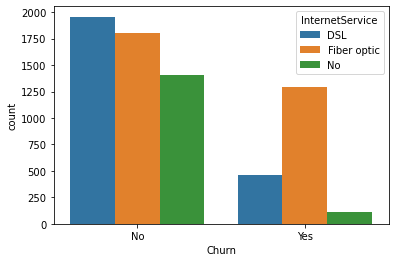

In [24]:
sns.countplot(x='Churn', hue = 'InternetService', data=Telecom);

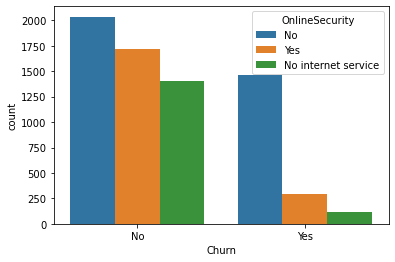

In [25]:
sns.countplot(x='Churn', hue = 'OnlineSecurity', data=Telecom);

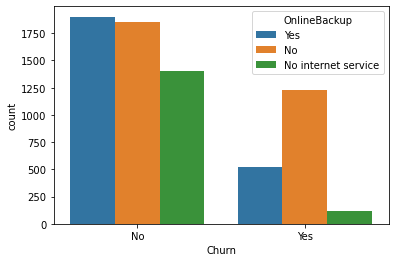

In [26]:
sns.countplot(x='Churn', hue = 'OnlineBackup', data=Telecom);

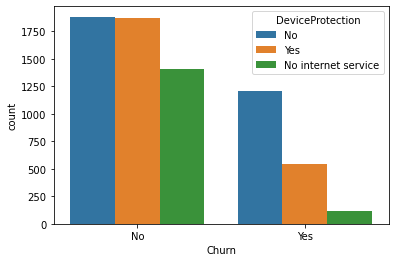

In [27]:
sns.countplot(x='Churn', hue = 'DeviceProtection', data=Telecom);

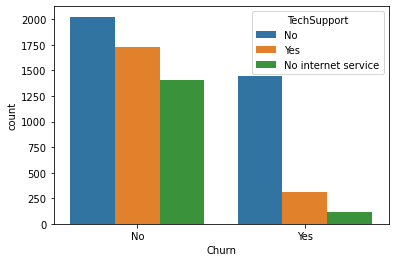

In [28]:
sns.countplot(x='Churn', hue = 'TechSupport', data=Telecom);

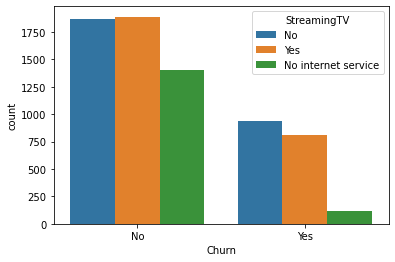

In [29]:
sns.countplot(x='Churn', hue = 'StreamingTV', data=Telecom);

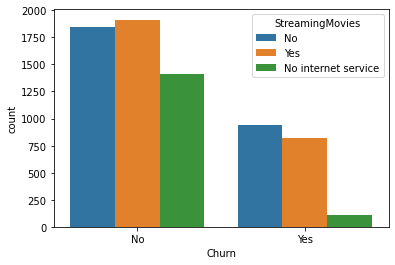

In [30]:
sns.countplot(x='Churn', hue = 'StreamingMovies', data=Telecom);

### Comments:
* Majority of the customers who churned out did not utlize the additonal services like - Movie streaming, TV streaming, Tech Support, Device protection, Online security etc

#### 3. Customer churn analysis based on customer demographic information

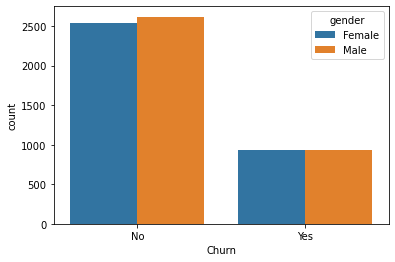

In [31]:
sns.countplot(x='Churn', hue = 'gender', data=Telecom);

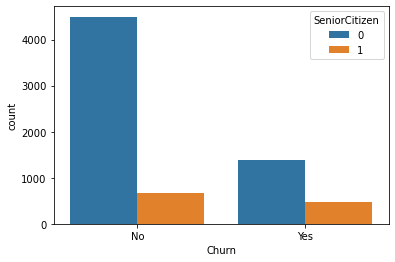

In [32]:
sns.countplot(x='Churn', hue = 'SeniorCitizen', data=Telecom);

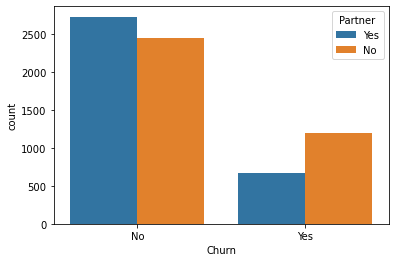

In [33]:
sns.countplot(x='Churn', hue = 'Partner', data=Telecom);

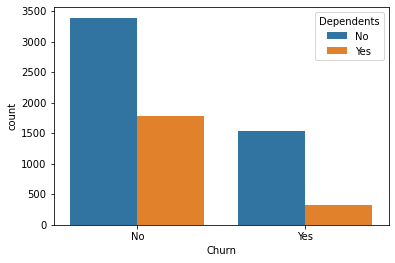

In [34]:
sns.countplot(x='Churn', hue = 'Dependents', data=Telecom);

### Comments:
* For each demographic feature, the ratio in churned and non-churned customer is almost the same

### Statistical Analysis

#### 1. Continuous feature versus target(categorical: Churn - Yes/No) correlation test

In [35]:
def cont_corr(column):
    CT = Telecom.groupby('Churn')[column].apply(list)
    Anova_result = f_oneway(*CT)
    print("Null Hypothesis H0: The variables are not correlated with each other.")
    print(f"P value of Anova Test on '{column}'' and 'Churn' is {Anova_result[1]:0.6f}")
    if Anova_result[1]>0.05:
        # Null Hypothesis Accepted
        print("Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.")
        print(f"{column} and 'Churn are not correlated with each other")
        print("=====================================================================================")
    else:
        # Null Hypothesis Rejected
        print("Since p-value is less than 0.05, we reject the Null Hypothesis Ho.")
        print(f"{column} and 'Churn are correlated with each other")
        print("=====================================================================================")

In [36]:
Cont_corr = map(cont_corr,cont_col)
display(list(Cont_corr))

Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'tenure'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
tenure and 'Churn are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'MonthlyCharges'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
MonthlyCharges and 'Churn are correlated with each other
Null Hypothesis H0: The variables are not correlated with each other.
P value of Anova Test on 'TotalCharges'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
TotalCharges and 'Churn are correlated with each other


[None, None, None]

In [37]:
def cat_corr(column):
    CT = pd.crosstab(index = Telecom[column], columns = Telecom['Churn'])
    Chi2 = chi2_contingency(CT)
    print(f"P value of Chi Square Test on '{column}'' and 'Churn' is {Chi2[1]:0.6f}")
    if Chi2[1]>0.05:
        # Null Hypothesis Accepted
        print("Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.")
        print(f"{column} and 'Churn are not correlated with each other")
        print("=====================================================================================")
    else:
        # Null Hypothesis Rejected
        print("Since p-value is less than 0.05, we reject the Null Hypothesis Ho.")
        print(f"{column} and 'Churn are correlated with each other")
        print("=====================================================================================")

#### 2. Categorical  feature versus target(categorical: Churn - Yes/No) correlation test

In [38]:
cat_columns = cat_col[:-2]
Cat_Corr = map(cat_corr,cat_columns)
print(list(Cat_Corr))

P value of Chi Square Test on 'customerID'' and 'Churn' is 0.494393
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
customerID and 'Churn are not correlated with each other
P value of Chi Square Test on 'gender'' and 'Churn' is 0.490488
Since p-value is greater than 0.05, we accept the Null Hypothesis Ho.
gender and 'Churn are not correlated with each other
P value of Chi Square Test on 'SeniorCitizen'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
SeniorCitizen and 'Churn are correlated with each other
P value of Chi Square Test on 'Partner'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
Partner and 'Churn are correlated with each other
P value of Chi Square Test on 'Dependents'' and 'Churn' is 0.000000
Since p-value is less than 0.05, we reject the Null Hypothesis Ho.
Dependents and 'Churn are correlated with each other
P value of Chi Square Test on 'PhoneService'' and 'Chu

### Comments:
 
- From the continuous features versus categorical target variable correlation test by ANOVA method:
    - We select the features which are correlated.
    - We drop the features which are not correlated from the analysis. Which are none, as all came out to be correlated
    - Selected features : 'tenure',' Monthly Charges','TotalCharges
    
- From the categorical features versus categorical target variable correlation test by Chi-Square method:
    - We select the features which are correlated.
    - We drop the features which are not correlated from the analysis
    - Selected features :SeniorCitizen','Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'
    - Dropped features : 'customerID','gender','PhoneService','Security'


### <u> Transformation of columns to categorical and One Hot Encoding </u>

In [39]:
# Loop through all columns in the dataframe and apply for columns with categorical strings
# Replace strings with an integer

for feature in Telecom.columns: 
    if Telecom[feature].dtype == 'object': 
        Telecom[feature] = pd.Categorical(Telecom[feature])
Telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [40]:
# Since senior citizen is already in bool, we can avoid modifying it and conmvert it back to int
Telecom['SeniorCitizen'] = pd.to_numeric(Telecom['SeniorCitizen'])
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [41]:
print(Telecom.gender.value_counts())
print("==========================")
print(Telecom.SeniorCitizen.value_counts())
print("==========================")
print(Telecom.Partner.value_counts())
print("==========================")
print(Telecom.Dependents.value_counts())
print("==========================")
print(Telecom.PhoneService.value_counts())
print("==========================")
print(Telecom.MultipleLines.value_counts())
print("==========================")
print(Telecom.InternetService.value_counts())
print("==========================")
print(Telecom.OnlineSecurity.value_counts())
print("==========================")
print(Telecom.OnlineBackup.value_counts())
print("==========================")
print(Telecom.DeviceProtection.value_counts())
print("==========================")
print(Telecom.TechSupport.value_counts())
print("==========================")
print(Telecom.StreamingTV.value_counts())
print("==========================")
print(Telecom.StreamingMovies.value_counts())
print("==========================")
print(Telecom.Contract.value_counts())
print("==========================")
print(Telecom.PaperlessBilling.value_counts())
print("==========================")
print(Telecom.PaymentMethod.value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

In [42]:
# Dictionary for categorical variable and corresponding numeric association
# For the columns that don't require a sequence like -1,0,1,2,,, one hot encoding will be used
replaceStruct = {
                "gender":{"Male": 0, "Female": 1},
                "Partner":{"No": 0, "Yes": 1},
                "Dependents":{"No": 0, "Yes": 1},
                "PhoneService":{"No": 0, "Yes": 1},
                "MultipleLines":{"No phone service":-1, "No": 0, "Yes": 1},
                "OnlineSecurity":{"No internet service":-1, "No": 0, "Yes": 1},
                "OnlineBackup":{"No internet service":-1, "No": 0, "Yes": 1},
                "DeviceProtection":{"No internet service":-1, "No": 0, "Yes": 1},
                "TechSupport":{"No internet service":-1, "No": 0, "Yes": 1},
                "StreamingTV":{"No internet service":-1, "No": 0, "Yes": 1},
                "StreamingMovies":{"No internet service":-1, "No": 0, "Yes": 1},
                "PaperlessBilling":{"No": 0, "Yes": 1},
                "Churn":{"No": 0, "Yes": 1},}

# Columns for one hot encoding
oneHotCols = ["InternetService","Contract","PaymentMethod"]           

In [43]:
# Replacing the column values with the dictioanry structure created
Telecom=Telecom.replace(replaceStruct)
Telecom=pd.get_dummies(Telecom, columns=oneHotCols)
Telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,-1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,-1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,9305-CDSKC,1,0,0,0,8,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
6,1452-KIOVK,0,0,0,1,22,1,1,0,1,...,0,1,0,1,0,0,0,1,0,0
7,6713-OKOMC,1,0,0,0,10,0,-1,1,0,...,1,0,0,1,0,0,0,0,0,1
8,7892-POOKP,1,0,1,0,28,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
9,6388-TABGU,0,0,0,1,62,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0


In [44]:
Telecom.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
Telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   category
 1   gender                                   7032 non-null   int64   
 2   SeniorCitizen                            7032 non-null   int64   
 3   Partner                                  7032 non-null   int64   
 4   Dependents                               7032 non-null   int64   
 5   tenure                                   7032 non-null   int64   
 6   PhoneService                             7032 non-null   int64   
 7   MultipleLines                            7032 non-null   int64   
 8   OnlineSecurity                           7032 non-null   int64   
 9   OnlineBackup                             7032 non-null   int64   
 10  DeviceProtection                    

### <u> PART 4 : Data pre-processing </u>

In [46]:
# Segregate predictors vs target attributes
Telecom_data = Telecom[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Partner', 
                       'Dependents', 'MultipleLines', 'InternetService_DSL','InternetService_Fiber optic',
                        'InternetService_No','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                        'StreamingTV','StreamingMovies','Contract_Month-to-month','Contract_One year',
                        'Contract_Two year','PaperlessBilling','Churn']]
X_df = Telecom_data.loc[:, Telecom_data.columns != 'Churn']
y_df = Telecom_data['Churn']

In [47]:
# Check for target balancing and fix it if found imbalanced.
y_df.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### Comments :
* The target variables are highly imbalaced
* Using upsampling and downsampling to identify which resample method works well

In [48]:
# Up-sample the minority data almost equal to majority count

# Separate majority and minority classes
df_majority = Telecom_data[y_df==0]
df_minority = Telecom_data[y_df==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5000,    # to match majority class
                                 random_state=77) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['Churn'].value_counts()

0    5163
1    5000
Name: Churn, dtype: int64

In [49]:
# Down-sample the majority data almost equal to minority count

# Separate majority and minority classes
df_majority = Telecom_data[y_df==0]
df_minority = Telecom_data[y_df==1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=1700,     # to match minority class
                                 random_state=77) # reproducible results
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled['Churn'].value_counts()

1    1869
0    1700
Name: Churn, dtype: int64

In [50]:
#Segregate predictors vs target attributes

X_df = df_downsampled.loc[:, Telecom_data.columns != 'Churn']  
y_df = df_downsampled['Churn']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X_df,y_df,test_size = 0.3, random_state=11)

### <u> PART 5 : Model training, testing and tuning </u>

#### 1. Model building on downsampled data

In [52]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=11)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

#### Scoring the decision tree

In [53]:
print("Train model accuracy (down sampled data):{0:.4f}".format(dTree.score(x_train, y_train)))
print("Test model accuracy (down sampled data):{0:.4f}".format(dTree.score(x_test, y_test)))

Train model accuracy (down sampled data):0.9976
Test model accuracy (down sampled data):0.6844


#### 2. Model building on upsampled data

In [54]:
X_df = df_upsampled.loc[:, Telecom_data.columns != 'Churn']  # choose appropriate dataframe
y_df = df_upsampled['Churn']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X_df,y_df,test_size = 0.3, random_state=11)

In [56]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=11)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

#### Scoring the decision tree

In [57]:
print("Train model accuracy (upsampled data):{0:.4f}".format(dTree.score(x_train, y_train)))
print("Test model accuracy (upsampled data):{0:.4f}".format(dTree.score(x_test, y_test)))

Train model accuracy (upsampled data):0.9956
Test model accuracy (upsampled data):0.8619


0.8619219416202033


<AxesSubplot:>

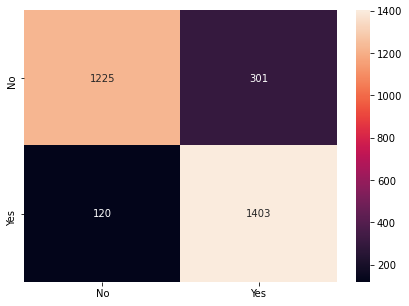

In [58]:
print(dTree.score(x_test , y_test))
y_predict = dTree.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [59]:
#Accuracy score of the model on predicted data
acc_DT = accuracy_score(y_test,y_predict)
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922


### Comments:
* In either case, the training data is quite overfitting because of the extremely high score.
* Out of the two, upsampled data shows better result in the test model, so we go ahead with the upsample data resampling

#### Visualization of the tree 

In [60]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Telecom_Tree_File = open('telecom_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Telecom_Tree_File, feature_names = list(x_train), class_names = list(train_char_label))
Telecom_Tree_File.close()

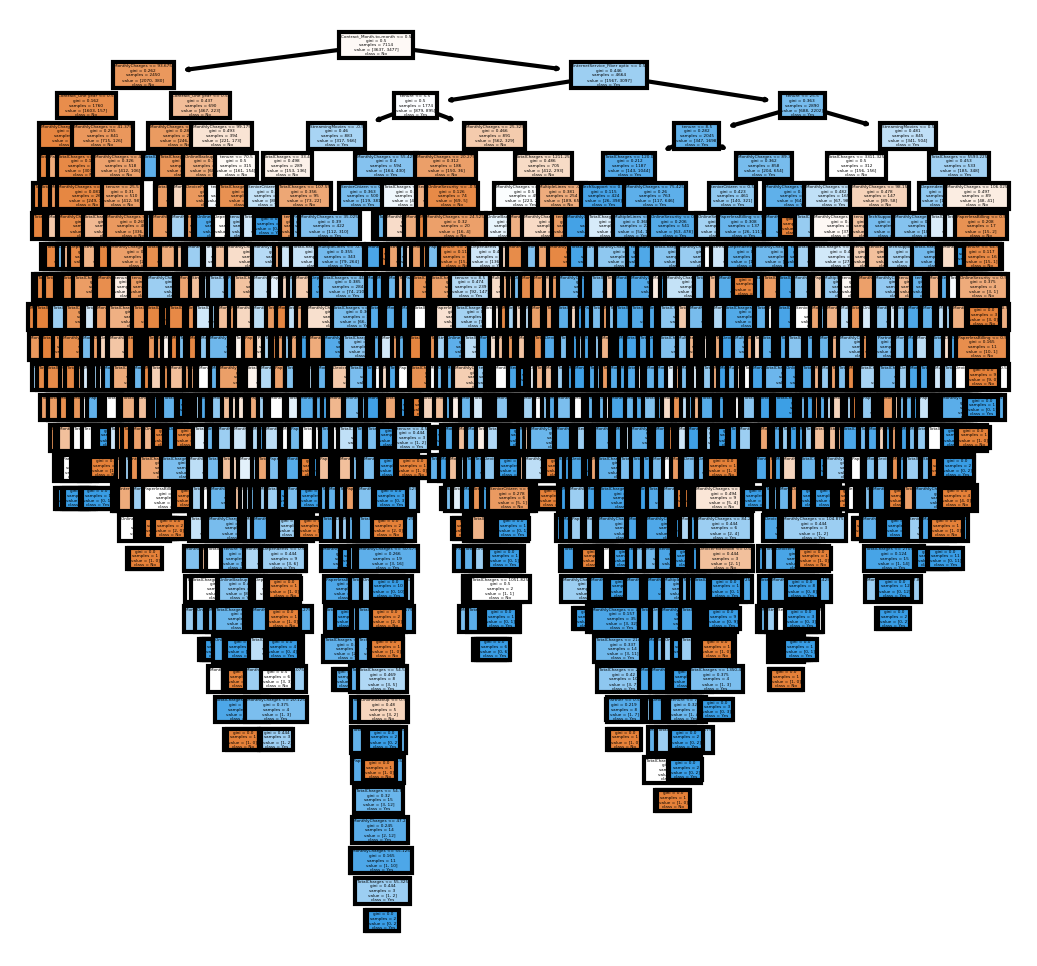

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

#### Reducing over fitting (Regularization)

In [62]:
# Experimented with max_leaf_nodes = 3,5,7 and the train test scores are better for max_leaf_nodes = 7
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 7, random_state=11)
dTreeR.fit(x_train, y_train)
print("Train model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_train, y_train)))
print("Test model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_test, y_test)))

Train model accuracy (after regularization of tree depth):0.7615
Test model accuracy (after regularization of tree depth):0.7694


In [63]:
# Experimented with min_impurity_decrease = 0.1,0.2,0.4 and the train test scores are better for min_impurity_decrease = 0.4
dTreeR = DecisionTreeClassifier(criterion = 'gini', min_impurity_decrease = 0.4, random_state=11)
dTreeR.fit(x_train, y_train)
print("Train model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_train, y_train)))
print("Test model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_test, y_test)))

Train model accuracy (after regularization of tree depth):0.5112
Test model accuracy (after regularization of tree depth):0.5005


In [64]:
# Experimented with max_depth = 3,5,7 and the train test scores are better for max_depth = 7
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, random_state=11)
dTreeR.fit(x_train, y_train)
print("Train model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_train, y_train)))
print("Test model accuracy (after regularization of tree depth):{0:.4f}".format(dTreeR.score(x_test, y_test)))

Train model accuracy (after regularization of tree depth):0.8039
Test model accuracy (after regularization of tree depth):0.7855


#### Comment:  Hypertuning of max_depth works the best here and the optimum value is max_depth = 7

In [65]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Importance"], index = x_train.columns))

                             Importance
tenure                         0.101298
MonthlyCharges                 0.139132
TotalCharges                   0.073994
SeniorCitizen                  0.009570
Partner                        0.000819
Dependents                     0.005420
MultipleLines                  0.006881
InternetService_DSL            0.000000
InternetService_Fiber optic    0.089535
InternetService_No             0.000000
OnlineSecurity                 0.003883
OnlineBackup                   0.003818
DeviceProtection               0.001109
TechSupport                    0.003780
StreamingTV                    0.000000
StreamingMovies                0.021580
Contract_Month-to-month        0.511325
Contract_One year              0.007274
Contract_Two year              0.015163
PaperlessBilling               0.005418


0.7855034437520498


<AxesSubplot:>

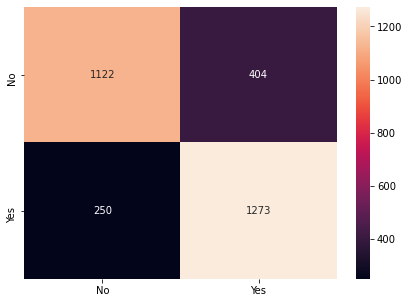

In [66]:
print(dTreeR.score(x_test , y_test))
y_predict = dTreeR.predict(x_test)

cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [67]:
#Accuracy score of the model on predicted data
acc_DTR = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree (Hypertuning)'], 'accuracy': [acc_DTR]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503


#### Ensembel Learning using Bagging

In [68]:
# We are using the base model as the complex model that was generated initially which has no restriction on the depth

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=11)
bgcl = bgcl.fit(x_train, y_train)

In [69]:
y_predict = bgcl.predict(x_test)
print("Model score using Bagging: {0:.4f}".format(bgcl.score(x_test , y_test)))

Model score using Bagging: 0.8809


In [70]:
#Accuracy score of the model on predicted data
acc_ETBag = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble: Bagging(Base DT)'], 'accuracy': [acc_ETBag]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945


In [71]:
# We are using the base model as the regularized model that was generated with some restriction on the depth

bgcl = BaggingClassifier(base_estimator=dTreeR,n_estimators=50,random_state=11)
bgcl = bgcl.fit(x_train, y_train)

In [72]:
y_predict = bgcl.predict(x_test)
print("Model score using Bagging: {0:.4f}".format(bgcl.score(x_test , y_test)))

Model score using Bagging: 0.8098


In [73]:
#Accuracy score of the model on predicted data
acc_ETBag = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble: Bagging(Hypertuned DT)'], 'accuracy': [acc_ETBag]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945
0,Ensemble: Bagging(Hypertuned DT),0.809774


<AxesSubplot:>

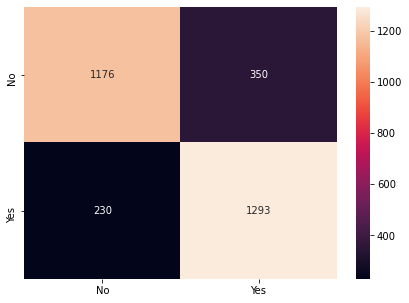

In [74]:
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Ensembel Learning - AdaBoosting

In [75]:
abcl = AdaBoostClassifier(base_estimator=dTree,n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

In [76]:
y_predict = abcl.predict(x_test)
print("Model score using AdaBoost: {0:.4f}".format(abcl.score(x_test , y_test)))

Model score using AdaBoost: 0.8764


In [77]:
#Accuracy score of the model on predicted data
acc_ETAda = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble: AdaBoosting(Base DT)'], 'accuracy': [acc_ETAda]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945
0,Ensemble: Bagging(Hypertuned DT),0.809774
0,Ensemble: AdaBoosting(Base DT),0.876353


In [78]:
abcl = AdaBoostClassifier(base_estimator=dTreeR,n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

In [79]:
y_predict = abcl.predict(x_test)
print("Model score using AdaBoost: {0:.4f}".format(abcl.score(x_test , y_test)))

Model score using AdaBoost: 0.8176


In [80]:
#Accuracy score of the model on predicted data
acc_ETAda = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble: AdaBoosting(Hypertuned DT)'], 'accuracy': [acc_ETAda]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945
0,Ensemble: Bagging(Hypertuned DT),0.809774
0,Ensemble: AdaBoosting(Base DT),0.876353
0,Ensemble: AdaBoosting(Hypertuned DT),0.817645


<AxesSubplot:>

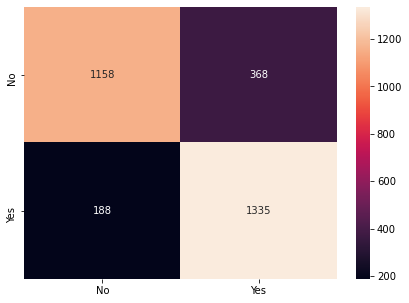

In [81]:
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### Ensembel Learning using Gradient Boost

In [82]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

Model score using Gradient Boost: 0.7796


<AxesSubplot:>

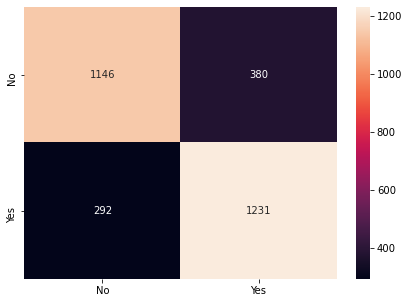

In [83]:
y_predict = gbcl.predict(x_test)
print("Model score using Gradient Boost: {0:.4f}".format(gbcl.score(x_test, y_test)))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [84]:
#Accuracy score of the model on predicted data
acc_ETGB = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble: Gradient Boosting'], 'accuracy': [acc_ETGB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945
0,Ensemble: Bagging(Hypertuned DT),0.809774
0,Ensemble: AdaBoosting(Base DT),0.876353
0,Ensemble: AdaBoosting(Hypertuned DT),0.817645
0,Ensemble: Gradient Boosting,0.779600


#### Ensembel Random Forest Classifier

In [85]:
# After experimenting with various values, the combination of max_features = 12 and n_est = 30 gives the best result
rfcl = RandomForestClassifier(n_estimators = 30, random_state=11, max_features=12)
rfcl = rfcl.fit(x_train, y_train)

In [86]:
y_predict = rfcl.predict(x_test)
print("Model score using Random Forest Classifier : {0:.4f}".format(rfcl.score(x_test, y_test)))

Model score using Random Forest Classifier : 0.8865


<AxesSubplot:>

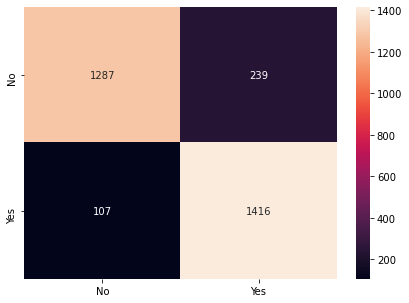

In [87]:
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [88]:
#Accuracy score of the model on predicted data
acc_RF = accuracy_score(y_test,y_predict)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.861922
0,Decision Tree (Hypertuning),0.785503
0,Ensemble: Bagging(Base DT),0.880945
0,Ensemble: Bagging(Hypertuned DT),0.809774
0,Ensemble: AdaBoosting(Base DT),0.876353
0,Ensemble: AdaBoosting(Hypertuned DT),0.817645
0,Ensemble: Gradient Boosting,0.779600
0,Random Forest Classifier,0.886520


### <u> Analysis and comments on various model results </u>

1. Analysis on the Basic Decision Tree
    * The base decision tree was build on both upsampled and downsampled data
    * The upsampled data gave better scores so we go ahead with that model as the base decision tree referred as Base DT henceforth.
    * Because of the very high score (~99%) of the Base DT, we suspect a overfitted model hence we hypertune the model.
    * After hypertuning max_depth, max_leaf_nodes, min_impurity_decrease and max_depth, we settle for a model that has fairly good score after restricitng the tree depth to 7.
    * This model is referred as Hypertune DT, henceforth.

2. Analysis on Ensemble : Bagging, Adaboosting and Gradient Boosting
    * As observed from the accuracy scores, all three of them perform better when fitted on the Base DT rather than Hypertuned DT.
    * Out of these three, Bagging Ensemble performs the best.
    
3. Random forest classifer has even better results than the above mentioned ensemble techniques.


### <u> PART 6 : Conclusion and improvisation </u>

#### In conclusion, Random Forest Classifier and Bagging Ensemble technique works the best for our data

#### Volume : Suggested improvements in the data volume
* The data is quite enough for modelling
* Additonaly , if the data was spread across various more months it would have given better insights on the history


#### Velocity : Suggested improvements in the data velocity/frequency of collection
* Data frequency does not play a role here

#### Variety : Suggested improvements in the data variety/type of data sources available
* Some user comments, emails that suggest their probable reason for churn might be helpful

#### Veracity : Suggested improvements in the data quality
* Overall the data quality was good, very few Nan or missing value.

#### Value : Suggested improvements in the value addition
* The data was highly unequal for the various class, equal amount of data for all the classes is recommended



<u> Please Note : In the HTML version, random underlines are appearning due to some unknown reason </u>